This notebook will be used for the Capstone project

## Introduction

Everyday around the world, drivers are actively commuting to places in their daily lifestyle. With the large amount of driving occuring, it is inevitable that accidents will be a part of the driving experience. Using the data from the Seattle Department of Transportation(SDOT), this inquiry seeks to find any correlation between certain factors in a car accident and the likeliness of how it might affect a person's ability to drive. 


In [1]:
import pandas as pd
import numpy as np
import types
import pandas as pd

df = pd.read_csv(body, dtype={'FATALITIES': np.float32})
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Organizing the Data

The dataset being used contains data that are both categorical and numerical. A dataframe was made that seperated these data types for easeir analysis. Based off the data avaliable, it was concluded that the severity of the accident indicated in either a 1 (property damage) or a 2 (injury). Using this, a general idea could be formed from organizing the data to see the accidents that resulted in injury or not. The data showed that 136,485 incidents were involved in property damage while 58,188 incidents resulted in a form of injury. In addition, we can describe the dataset to see the basic statistical information of the numerical attributes to see if a certain pattern can be found.

In [2]:
df_num = df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_cate = df[['SEVERITYCODE' , 'LOCATION' , 'COLLISIONTYPE','JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER' , 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]

In [3]:
print(df['SEVERITYCODE'].unique())
print(df.groupby('SEVERITYCODE').size())
df_num.describe()

[2 1]
SEVERITYCODE
1    136485
2     58188
dtype: int64


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,0.037139,0.028391,1.920780
std,0.457778,1.345929,0.198150,0.167413,0.631047
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000


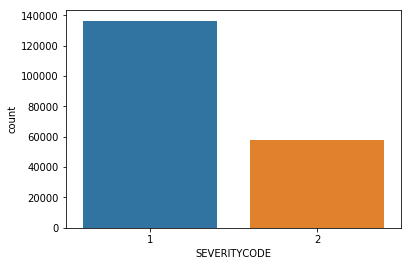

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['SEVERITYCODE'],label="Count")
plt.show()

In [5]:
df['SEVERITYCODE'].value_counts()


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

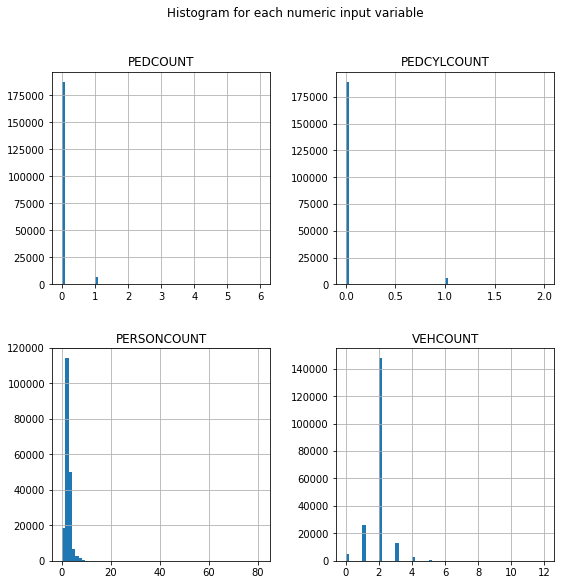

In [6]:
df_num.drop('SEVERITYCODE' ,axis=1).hist(bins=60, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('SEVERITY')
plt.show()

## Methodology and Predictions

In order to predict the possibility of an accident having an injury, the machine learning methods of logistic regression, KNeighborsClassifier, and decision trees will be used. 

In [7]:
feature_names = ['PEDCOUNT', 'PEDCYLCOUNT', 'PERSONCOUNT', 'VEHCOUNT']
df_num = df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
X = df_num[feature_names]
y = df['SEVERITYCODE']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.75


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.75


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on test set: 0.76


Feature: 0, Score: 0.39486
Feature: 1, Score: 0.29577
Feature: 2, Score: 0.27467
Feature: 3, Score: 0.03470


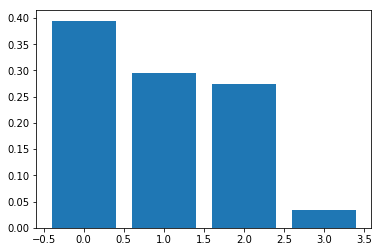

In [15]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

importance = clf.feature_importances_
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Results and Discussion

From the accuracy scores from each of these models, we can use the decision tree classifier to give us more insight into which factors are most influential in whether or not an injury will be more likely to happen. This is because the decision tree classifier was the most accuracy predictor with a accuracy percentage of 0.76

From this table, we can see the list of most and least important features related to a car accident with injuries.
We can cleary see that feature 0 is the most influential on the data, followed by each successive feature. 
Feature 0, or Pedestrian count, was most likely to cause an accident with an injury, followed by cyclist count, overall person count, and finally vehical count. 
The recurring trend for this result seems to be focues around the fact that some of these factors do not involve a vehical while others do. As such, non-vehical factors contribute more 
(39.4% and 29% vs 27% and 3%) to the possibility of an injury.


## Conclusion

From the data provided by the SDOT, an analysis was able to show that the most influential factor of a car accident was related to instances where pedestrians or humans without a vehical were involved. Using the predictive models of Logistic Regression, K-Nearest Neighbors, and Decision Trees, the most accurate model in Decision Trees was selected and analyzed for these factor weights. The main takeaway from this analysis is that drivers need to be alert in crosswalks or residential zones; likewise, pedestrians must take care to be aware of nearby vehicals as they are at the most risk. 